In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,root_mean_squared_error

# **House Price Prediction System**

### Part B: Dataset Understanding & Preparation

#### 1. Identify independent and dependent variables.
#### 2. Visualize relationships between features and target variable.

In [130]:
df = pd.read_csv("RealEstate_HousePrice_Dataset_4200 - RealEstate_HousePrice_Dataset_4200.csv.csv")
df

,house_id,area_sqft,bedrooms,bathrooms,location_score,age_years,distance_city_km,lot_size_sqft,has_garage,has_pool,renovation_years_ago,house_price_inr
0,100001,1973,5,4,7.6,23,11.9,5220,1,0,0,40275084
1,100002,1560,3,3,6.3,13,15.8,3882,1,0,13,26812029
2,100003,2071,4,3,5.8,9,21.1,4488,0,0,9,29315677
3,100004,2640,5,3,7.7,12,7.9,3614,1,1,4,47712959
4,100005,1498,3,3,3.8,15,24.0,2663,0,0,15,17724566
...,...,...,...,...,...,...,...,...,...,...,...,...
4195,104196,1328,4,2,4.9,21,19.6,2606,1,0,21,18319188
4196,104197,2363,6,4,6.9,53,24.9,4013,1,0,14,40340976
4197,104198,632,2,2,4.5,27,19.4,1268,1,0,6,5978595
4198,104199,450,2,2,7.5,26,11.6,800,0,0,9,7916191


In [131]:
# Understanding The Dataset.
print(df.info())
print("========================================================================================")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   house_id              4200 non-null   int64  
 1   area_sqft             4200 non-null   int64  
 2   bedrooms              4200 non-null   int64  
 3   bathrooms             4200 non-null   int64  
 4   location_score        4200 non-null   float64
 5   age_years             4200 non-null   int64  
 6   distance_city_km      4200 non-null   float64
 7   lot_size_sqft         4200 non-null   int64  
 8   has_garage            4200 non-null   int64  
 9   has_pool              4200 non-null   int64  
 10  renovation_years_ago  4200 non-null   int64  
 11  house_price_inr       4200 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 393.9 KB
None
            house_id    area_sqft     bedrooms    bathrooms  location_score  \
count    4200.000000  4200.000000  4200.00

In [132]:
# Showing How Much Missing Values Are There In The Dataset And Dropping Irrelavent Columns
print(f"{df.isnull().sum()}")
df.drop("house_id",axis=1,inplace=True)


house_id                0
area_sqft               0
bedrooms                0
bathrooms               0
location_score          0
age_years               0
distance_city_km        0
lot_size_sqft           0
has_garage              0
has_pool                0
renovation_years_ago    0
house_price_inr         0
dtype: int64


#### Identifying Dependent And Independent Variables
Independent Variables : "area_sqft","bedrooms","bathrooms","location_score","lot_size_sqft","has_garage","has_pool".

Dependent Variables : "house_price_inr"


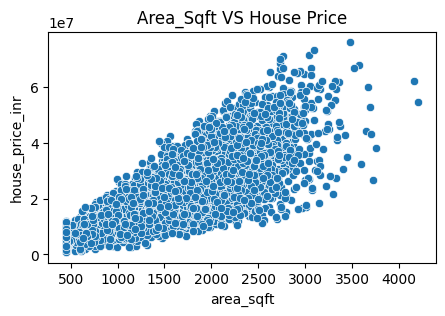

In [133]:
# Scatter Plot Of Area_Sqft VS House Price
plt.figure(figsize=(5,3))
sns.scatterplot(data=df,x="area_sqft",y="house_price_inr")
plt.title("Area_Sqft VS House Price")
plt.show()

From The Above Graph It Can Be Seen That With The Increase Of Area_sqft price Of Houses Are Also Increasing. So There Is A Strong Relation Between House Price And Area_sqft

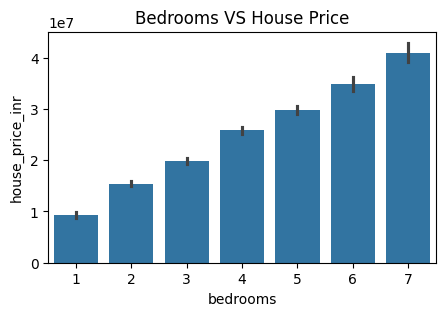

In [134]:
# BarChart Of Bedrooms VS House Price
plt.figure(figsize=(5,3))
sns.barplot(data=df,x="bedrooms",y="house_price_inr")
plt.title("Bedrooms VS House Price")
plt.show()

From The Above Graph It Can Be Seen That As The Number of Bedrooms Are Increasing The Price Of The Houses Are Also Increasing Because There is a Strong Linearity Between Them

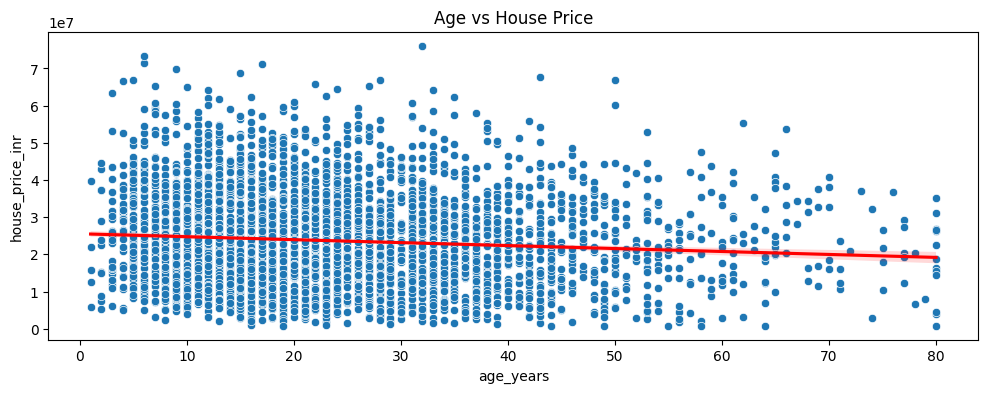

In [135]:
# ScatterPlot Plus RegPlot Of Age VS House Price.
plt.figure(figsize=(12,4))
sns.scatterplot(data=df, x="age_years", y="house_price_inr")
sns.regplot(data=df, x="age_years", y="house_price_inr",scatter=False, color="red")
plt.title("Age vs House Price")
plt.show()

From The Above Graph It Can Been That Houses Ranging From 0 To 25 Years Are Likely To Have More Prices Other Than Houses Which Are Older having Lower Price Camparing To Newer Houses.

### Part C: Simple Linear Regression

#### 3. Split the dataset into training and testing sets.
#### 4. Implement Simple Linear Regression using one feature (e.g., House Area).
#### 5. Plot the regression line and interpret the slope and intercept.
#### 6. Validate linear regression assumptions using plots and observations.

In [136]:
# Selecting Independent(X) And Dependent Variables(Y)
x_simple = df[["area_sqft"]]
y = df["house_price_inr"]

# Spliting The Dataset Into Training And Testing Sets
x_train,x_test,y_train,y_test = train_test_split(x_simple,y,test_size=0.2)

model_pipeline = Pipeline([
    ("Linear",LinearRegression())
])

model_pipeline.fit(x_train,y_train)
y_pred = model_pipeline.predict(x_test)

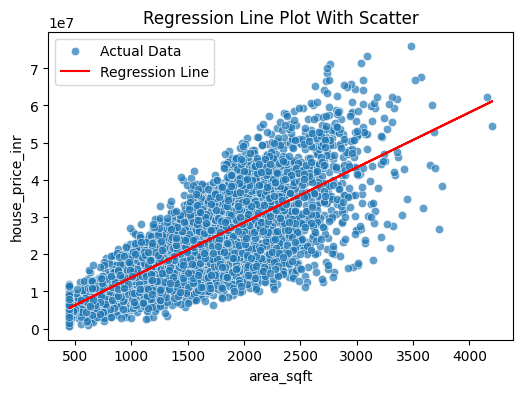

In [137]:
# Ploting The Regression The Line
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x="area_sqft",y="house_price_inr",alpha=0.7,label="Actual Data")
plt.plot(x_test,y_pred,color="red",label="Regression Line")
plt.title("Regression Line Plot With Scatter",)
plt.legend()
plt.show()

The slope tells us how much the house price changes with a one-unit increase in area. A positive slope indicates that larger houses tend to be more expensive.

In [138]:
slope = model_pipeline.named_steps["Linear"].coef_
intercept = model_pipeline.named_steps["Linear"].intercept_
print(f"Slope : {slope}")
print(f"Each Additional 1 Sqft Adds ({slope}) To The House Price\n")
print(f"Intercept : {intercept}")
print(f"When The Area_Sqft Is 0 The Price Of The House Is ({intercept})")

Slope : [14803.63423704]
Each Additional 1 Sqft Adds ([14803.63423704]) To The House Price

Intercept : -1089047.7341325618
When The Area_Sqft Is 0 The Price Of The House Is (-1089047.7341325618)


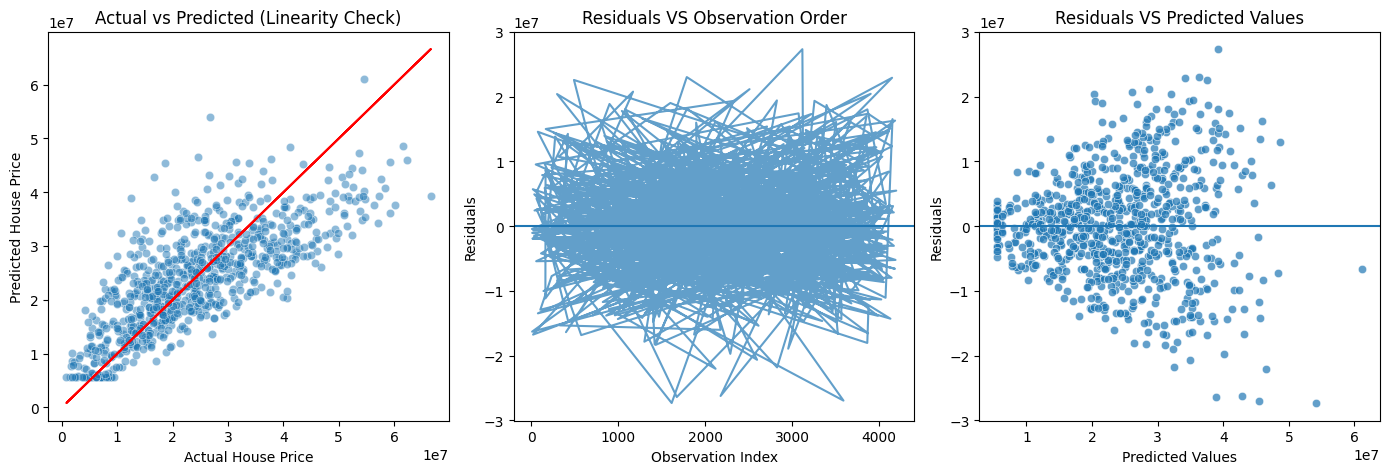

In [139]:
# Validating Linear Regression Assumptions
residuals = y_test-y_pred
plt.figure(figsize=(14,5))

# 1) Assumption: Linearity (plot Actual vs Predicted on the test set)
plt.subplot(1,3,1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot(y_test,y_test, color="red")
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted (Linearity Check)")

# 2) Indenpendence Of Errors (Residuals Should Be Independent of Each Other)
plt.subplot(1,3,2)
plt.plot(residuals,alpha=0.7)
plt.axhline(0)
plt.title("Residuals VS Observation Order")
plt.xlabel("Observation Index")
plt.ylabel("Residuals")

# 2) Homoscedasticity (Constant Variance)
plt.subplot(1,3,3)
sns.scatterplot(x=y_pred,y=residuals,alpha=0.7)
plt.axhline(0)
plt.title("Residuals VS Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

### Part D: Model Evaluation Metrics

#### 7. Evaluate the Simple Linear Regression model using:
####  -Mean Squared Error (MSE)
####  -Mean Absolute Error (MAE)
####  -Root Mean Squared Error (RMSE)
####  -R2 Score
####  -Adjusted R2 Score

In [140]:
# Calculating Mean Absolute Error And R-2 Square And All the Metrics
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Absolute Error : {mae:.2f}")
print(f"Mean Squared Error : {mse:.2f}")
print(f"Root Mean Squared Error : {rmse:.2f}")
print(f"R-2 Square : {r2:.2f}")

# Adjusted R2 Score Is Not For Simple Linear Regressin it is For Multi Linear Regression

Mean Absolute Error : 6370989.67
Mean Squared Error : 67879306199542.36
Root Mean Squared Error : 8238889.86
R-2 Square : 0.58


#### Interpreting Each Metric And What it Reveals About Model Performance
1) Mean Absolute Error Tell The Exact Difference Between The Actual Y(Target Variable) And The Predicted Y. In Our Model The Difference Is Minimal Which Is Good.

2) Mean Squared Error Does The Same as Mean Absolute Error But Square The Actual Y And The Predicted Y. This are All ByProducts Of Mean Absolute Error So it Reveals The same As MAE. 

3) Root Mean Squared Error Does The Same As Mean Squared Error But Root The Actual Y And The Predicted Y. This are All ByProducts Of Mean Absolute Error So it Reveals The same As MAE.

4) R² Score represents the proportion of variance in house prices explained by the model. From Our Model The R2 Score Is 55 Percent It Reveals That The Is Good As The Variations Are Good

### Part E: Multiple Linear Regression

#### 8. Implement Multiple Linear Regression using all relevant features.
#### 9. Compare its performance with Simple Linear Regression.
#### 10. Explain why performance improves or degrades.

In [141]:
# Selecting All Relevant Features
x_multi = df[["area_sqft","bedrooms","bathrooms","location_score","lot_size_sqft","has_garage","has_pool"]]
y = df["house_price_inr"]

# Spliting The Dataset Into Training And Testing Sets
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_multi,y,test_size=0.2)

# Creating Preprocessing Pipeline For Scaling The Data
preprocessing = ColumnTransformer(transformers=[
    ("num",StandardScaler(),x_multi.columns)
])

# Creating A Pipeline For The Model
model_multi_pipeline = Pipeline([
    ("preprocess",preprocessing),
    ("Linear",LinearRegression())
])

model_multi_pipeline.fit(x_train2,y_train2)
y_pred2 = model_multi_pipeline.predict(x_test2)

In [142]:
# Calculating Mean Absolute Error And R-2 Square.
mae = mean_absolute_error(y_test2,y_pred2)
r2 = r2_score(y_test2,y_pred2)
print(f"Mean Absolute Error : {mae:.2f}")
print(f"R-2 Square : {r2:.2f}")

Mean Absolute Error : 2722827.15
R-2 Square : 0.92


In [143]:
# Comparing Performance With Simple Linear Regression Using K-Cross Validation

# Cross Validation For Simple Linear Regression
cross_vali_r2_simple = cross_val_score(model_pipeline,x_simple,y,cv=5,scoring="r2")
print(f"Cross Validation Scores Simple : {cross_vali_r2_simple}")
print(f"Mean of CV Scores : {cross_vali_r2_simple.mean():.2f}")

# Cross Validation For Multiple Linear Regression
cross_vali_r2_multi = cross_val_score(model_multi_pipeline,x_multi,y,cv=5,scoring="r2")
print(f"\nCross Validation Scores Multi : {cross_vali_r2_multi}")
print(f"Mean of CV Scores : {cross_vali_r2_multi.mean():.2f}")

Cross Validation Scores Simple : [0.58457047 0.57115273 0.54676693 0.56824699 0.57545567]
Mean of CV Scores : 0.57

Cross Validation Scores Multi : [0.92325605 0.91451203 0.91625755 0.91357981 0.90975914]
Mean of CV Scores : 0.92


1) After Comparing The Cross Validations Scores Of Both The Regression We Can See That Multi Linear Regression Has The Highest CV Scores After Computing 5 Times.

2) The Reason Of its Increasing Performance Is More Input Variable Or Input Features, Because As The Number Of Features Increases The More Relevant The Data Becomes And The More Scope The Dependent Variable Has So AtLast The Data Is Linear And Its Linearity Has Contributed To The Outcome

### Part F: Polynomial Regression

#### 11. Implement Polynomial Regression (degree 2 or 3).
#### 12. Compare linear vs polynomial regression visually and numerically.
#### 13. Identify signs of overfitting or underfitting.

In [144]:
# Implementing Polynomial Regression With Degrees.
x_poly = df[["area_sqft","bedrooms","bathrooms","location_score","lot_size_sqft","has_garage","has_pool"]]
y = df["house_price_inr"]

# Spliting The Dataset Into Training And Testing Sets
x_train3,x_test3,y_train3,y_test3 = train_test_split(x_poly,y,test_size=0.2)

# Creating A Pipeline To Fil Into Models Which Are Way Better Than Normal Methods
poly_model = Pipeline([
    ("poly",PolynomialFeatures(degree=2,include_bias=False)),
    ("linear",LinearRegression())
])

poly_model.fit(x_train3,y_train3)

# predicting The Price Based On Testing data
y_pred3 = poly_model.predict(x_test3)

In [145]:
# Calculating Mean Absolute Error And R-2 Square.
mae = mean_absolute_error(y_test3,y_pred3)
r2 = r2_score(y_test3,y_pred3)
print(f"Mean Absolute Error : {mae:.2f}")
print(f"R-2 Square : {r2:.2f}")

Mean Absolute Error : 1869360.25
R-2 Square : 0.96


In [146]:
# Comparing Linear And Polynomials Regression Both Visually And Numerically

# Comparing Numerically Using Cross Validation Scores
cross_vali_r2_multi = cross_val_score(model_multi_pipeline,x_multi,y,cv=5,scoring="r2")
print(f"Cross Validation Scores Multi : {cross_vali_r2_multi}")
print(f"Mean of CV Scores : {cross_vali_r2_multi.mean():.2f}\n")

cross_vali_r2_poly = cross_val_score(poly_model,x_poly,y,cv=5,scoring="r2")
print(f"Cross Validation Scores Poly : {cross_vali_r2_poly}")
print(f"Mean of CV Scores : {cross_vali_r2_poly.mean():.2f}")

Cross Validation Scores Multi : [0.92325605 0.91451203 0.91625755 0.91357981 0.90975914]
Mean of CV Scores : 0.92

Cross Validation Scores Poly : [0.96265546 0.95544446 0.95544355 0.95928399 0.96562823]
Mean of CV Scores : 0.96


From the Above Score It Can Be Seen That Both The Regression Cross Validation Scores Are Above 90 Percent Which is Very Good But Polynomial Regression Is 96 Percent Way Better Than Linear Regression As Polynomial Regression Use Degrees To Turn The Regression Line Which Redues The Mean Absolute Error. 

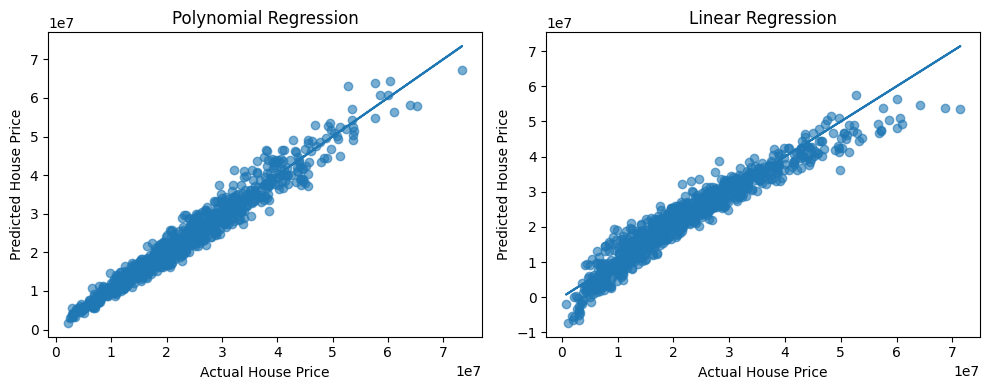

In [147]:
# Comparing Visually
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(y_test3, y_pred3, alpha=0.6)
axes[0].plot(y_test3,y_test3)
axes[0].set_xlabel("Actual House Price")
axes[0].set_ylabel("Predicted House Price")
axes[0].set_title("Polynomial Regression")

axes[1].scatter(y_test2, y_pred2, alpha=0.6)
axes[1].plot(y_test2,y_test2)
axes[1].set_xlabel("Actual House Price")
axes[1].set_ylabel("Predicted House Price")
axes[1].set_title("Linear Regression")
plt.tight_layout()
plt.show()


The subplot compares polynomial and linear regression using actual vs predicted values on the test set. The polynomial model shows predictions closer to the ideal diagonal, indicating better performance

#### Signs Of OverFitting And UnderFitting :
1) In The Polynomial Regression If The Scatter Points Are Clustered More Tightly Near The Diaganol Line There Is A Sign Of OverFitting Because With The Increase In Degree The Features Also Increases Which Is Not Good After Some Degree.

2) In The Linear Regression If The Scatter Points Are Spread More Freely (Wider) There Is A Chance Of UnderFitting Because Linear Regression Cannot Handle Non-Linear Relationships.

### Part G: Gradient Descent Optimization

#### 14. Explain Gradient Descent conceptually.
#### 15. Implement Batch Gradient Descent from scratch.
#### 16. Implement Stochastic Gradient Descent (SGD).
#### 17. Implement Mini-Batch Gradient Descent.
#### 18. Compare convergence behavior and training time of all three methods.

#### What is Gradient Descent ?
Gradient Descent Is The BackBone Of The Learning Process For Various Algorithms, Including Linear Regression, Logistic
Regression, Support Vector Machines And Neural Networks Which Serves As a Fundamental Optimization Technique To Minimize The Cost Function Of A Model By Iteratively Adjusting The Parameters To Reduce The differences Between Predicted Values And Actual Values. 

#### Batch-Gradient Descent 👇

In [148]:
# Implementing Batch Gradient Descent Regressor Model.
x_batchg = df[["area_sqft","bedrooms","bathrooms","location_score","lot_size_sqft","has_garage","has_pool"]]
y = df["house_price_inr"]

# Spliting The Dataset Into Training And Testing Sets.
x_train4,x_test4,y_train4,y_test4 = train_test_split(x_batchg,y,test_size=0.2)

# Creating An Preprocessor Of Scaling The Data
preprocessing = ColumnTransformer(transformers=[
    ("num",StandardScaler(),x_batchg.columns)
])

# Creating A Pipeline
model_batchg_pipeline = Pipeline([
    ("preprocessing",preprocessing),
    ("Batch_gradient",LinearRegression())
])

# Fitting The Model
model_batchg_pipeline.fit(x_train4,y_train4)
y_pred4 = model_batchg_pipeline.predict(x_test4)

In [149]:
# Calculating Mean Absolute Error And R-2 Square.
mae = mean_absolute_error(y_test4,y_pred4)
r2 = r2_score(y_test4,y_pred4)
print(f"Mean Absolute Error : {mae:.2f}")
print(f"R-2 Square : {r2:.2f}")

Mean Absolute Error : 2685522.06
R-2 Square : 0.92


#### Stochastic Gradient Descent 👇

In [150]:
# Implementing Stochastic Gradient Descent Regressor Model.
x_stochastg = df[["area_sqft","bedrooms","bathrooms","location_score","lot_size_sqft","has_garage","has_pool"]]
y = df["house_price_inr"]

# Spliting The Dataset Into Training And Testing Sets.
x_train5,x_test5,y_train5,y_test5 = train_test_split(x_stochastg,y,test_size=0.2)

# Creating A Preprocessor For Scaling The Data
preprocessing = ColumnTransformer(transformers=[
    ("num",StandardScaler(),x_stochastg.columns)
])

# Creating A Pipeline
model_stochastg_pipeline = Pipeline([
    ("preprocess",preprocessing),
    ("Stochastic Gradient",SGDRegressor())
])

# Fitting The Model
model_stochastg_pipeline.fit(x_train5,y_train5)
y_pred5 = model_stochastg_pipeline.predict(x_test5)

In [151]:
# Calculating Mean Absolute Error And R-2 Square.
mae = mean_absolute_error(y_test5,y_pred5)
r2 = r2_score(y_test5,y_pred5)
print(f"Mean Absolute Error : {mae:.2f}")
print(f"R-2 Square : {r2:.2f}")

Mean Absolute Error : 2656782.94
R-2 Square : 0.91


#### Mini-Batch Gradient Descent 👇

In [152]:
# Implementing Mini-Batch Gradient Descent Regressor Model.
x_minibatchg = df[["area_sqft","bedrooms","bathrooms","location_score","lot_size_sqft","has_garage","has_pool"]]
y = df["house_price_inr"]

# Spliting The Dataset Into Training And Testing Sets.
x_train6,x_test6,y_train6,y_test6 = train_test_split(x_minibatchg,y,test_size=0.2)

# Creating A Preprocessor For Scaling The Data
preprocessing = ColumnTransformer(transformers=[
    ("num",StandardScaler(),x_minibatchg.columns)
])

# Creating A Pipeline
model_minibatchg_pipeline = Pipeline([
    ("preprocess",preprocessing),
    ("Mini batch Gradient",SGDRegressor(loss="squared_error",learning_rate="invscaling",eta0=0.01,max_iter=1000,tol=None))
])

# Fitting The Model
model_minibatchg_pipeline.fit(x_train6,y_train6)
y_pred6 = model_minibatchg_pipeline.predict(x_test6)

In [153]:
# Calculating Mean Absolute Error And R-2 Square.
mae = mean_absolute_error(y_test6,y_pred6)
r2 = r2_score(y_test6,y_pred6)
print(f"Mean Absolute Error : {mae:.2f}")
print(f"R-2 Square : {r2:.2f}")

Mean Absolute Error : 2776840.52
R-2 Square : 0.91


### Part H: Bias-Variance & Model Diagnostics

#### 19. Analyze bias and variance across:
#### • Simple Linear Regression
#### • Multiple Linear Regression
#### • Polynomial Regression
#### 20. Explain how model complexity affects prediction error.
#### 21. Identify which model best balances bias and variance.

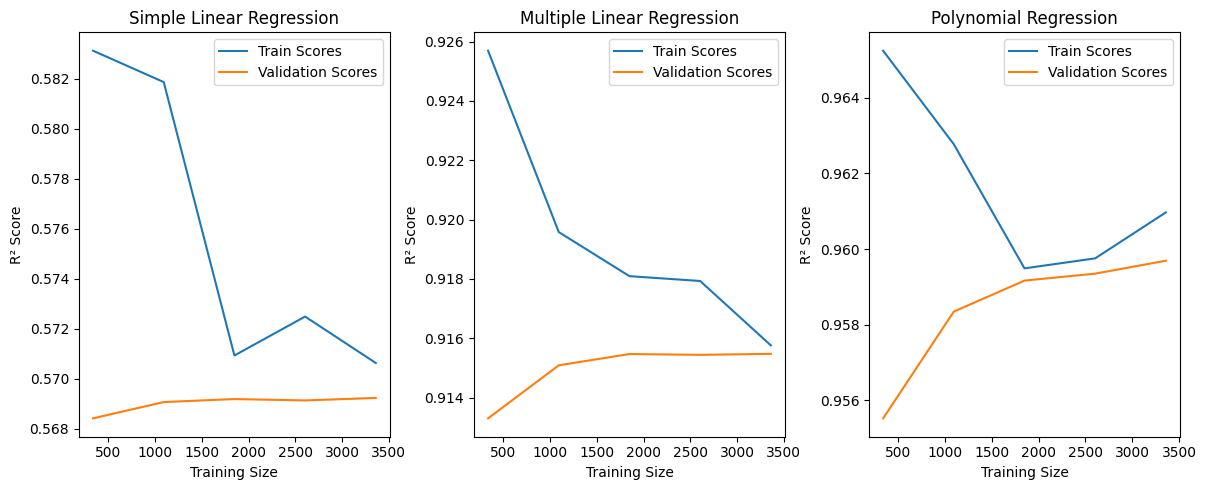

In [154]:
# Analyzing Bias-Variance Across SLR,MLR And Polynomial Regression

def plot_learning_curves(model,x,y,title):
    train_sizes,train_scores,test_scores = learning_curve(model,x,y,cv=5,scoring="r2")

    plt.plot(train_sizes,train_scores.mean(axis=1),label="Train Scores")
    plt.plot(train_sizes,test_scores.mean(axis=1),label="Validation Scores")
    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("R² Score")
    plt.legend()

plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plot_learning_curves(model_pipeline, x_simple, y, "Simple Linear Regression")
plt.subplot(1,3,2)
plot_learning_curves(model_multi_pipeline, x_multi, y, "Multiple Linear Regression")
plt.subplot(1,3,3)
plot_learning_curves(poly_model, x_poly, y, "Polynomial Regression")
plt.tight_layout()
plt.show()

#### Low Level Model Complexity :
It Means High Bias Make Strong Assumptions, Cannot Capture Strong Relationship And The Result Is UnderFitting
#### Medium Level Model Complexity :
It Means Best Bias And Variance Capture Important Patterns Without Fitting Noise The Result Minimum Prediction Error(Best Fit)
#### High Level Model Complexity :
It Means High Variance Very Flexible Models, Fit Noise With The Signal The Result OverFitting


### After Discussing The Complexity We Can See from the Graph That Multi Linear Regression Shows The Best Level Complexity Which Is Called Minimum Prediction Error In Which The Models Has Best Bias And Variance

## Best Performance Model :

In [155]:
slr_r2_score = r2_score(y_test,y_pred)
multi_linear_r2_score = r2_score(y_test2,y_pred2)
polynomial_r2_score = r2_score(y_test3,y_pred3)
batchg_r2_score = r2_score(y_test4,y_pred4)
stochastic_r2_score = r2_score(y_test5,y_pred5)
mini_batchg_r2_score = r2_score(y_test6,y_pred6)

model_scores = {
    "Simple Linear Regression": slr_r2_score,
    "Multiple Linear Regression": multi_linear_r2_score,
    "Polynomial Regression": polynomial_r2_score,
    "Batch Gradient Descent": batchg_r2_score,
    "Stochastic Gradient Descent": stochastic_r2_score,
    "Mini-batch Gradient Descent": mini_batchg_r2_score
}

best_model = max(model_scores, key=model_scores.get)
best_score = model_scores[best_model]

print(f"Best Performance Model For This Dataset Is {best_model} With R² Score Of {best_score:.4f}")

Best Performance Model For This Dataset Is Polynomial Regression With R² Score Of 0.9584
